In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
np.set_printoptions(precision=3)
pd.set_option('precision', 3)

### Клиенты телекоммуникационной компании 

У вас есть набор данных от некой телекоммуникационной компании. Данные содержат информацию о пользователях компании, их демографических характеристиках, услугах, которыми они пользуются, продолжительности пользования услугами компании, способе оплаты и размере оплаты.

Задача состоит в том, чтобы проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые будут и не будут продлевать свой контракт с компанией).


Gender - пол (male / female) <br>
Senior - пенсионер или нет (1, 0)<br>
Married - состоит ли в браке (Yes, No) <br>
!!!Dependents - служащий или нет (Yes, No) <br>
Tenure - сколько месяцев человек является клиентом компании<br>
Phone - подключен ли телефон (Yes, No)<br>
MultiplePhone - подключено ли несколько телефонных каналов (Yes, No, No phone service)<br>
Internet - предоставляются ли услуги интернет соединения (DSL, Fiber optic, No)<br>
Security - подключен ли сервис интернет-безопасности (Yes, No, No internet service)<br>
Backup - активирована ли служба онлайн-резервного копирования (Yes, No, No internet service)<br>
Insurance - есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
Support - подключена ли служба технической поддержки (Yes, No, No internet service)<br>
TV - подключена ли служба потокового телевидения (Yes, No, No internet service)<br>
Movies - активирован ли сервис потокового кино (Yes, No, No internet service)<br>
Contract - тип клиентского контракта (Month-to-month, One year, Two year)<br>
EBilling - использует ли клиент безбумажный биллинг (Yes, No)<br>
PaymentMethod - способ оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
MonthlyCharges - текущий ежемесячный платеж<br>
TotalCharges - общая сумма, которую клиент заплатил за услуги за все время<br>
Churn - покинул ли клиент компанию (Yes or No)<br>


In [2]:
data = pd.read_csv('train.csv', index_col=0)
data.head(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Index,,,,,,,,,,,,,,,,,,,,
0,Female,0,Yes,Yes,67,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,Female,0,No,No,34,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False


In [3]:
# Смотрим информацию по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3591 entries, 0 to 3590
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          3591 non-null   object 
 1   Senior          3591 non-null   int64  
 2   Married         3591 non-null   object 
 3   Dependents      3591 non-null   object 
 4   Tenure          3591 non-null   int64  
 5   Phone           3591 non-null   object 
 6   MultiplePhones  3591 non-null   object 
 7   Internet        3591 non-null   object 
 8   Security        3591 non-null   object 
 9   Backup          3591 non-null   object 
 10  Insurance       3591 non-null   object 
 11  Support         3591 non-null   object 
 12  TV              3591 non-null   object 
 13  Movies          3591 non-null   object 
 14  Contract        3591 non-null   object 
 15  EBilling        3591 non-null   object 
 16  PaymentMethod   3591 non-null   object 
 17  MonthlyCharges  3591 non-null   f

<AxesSubplot:>

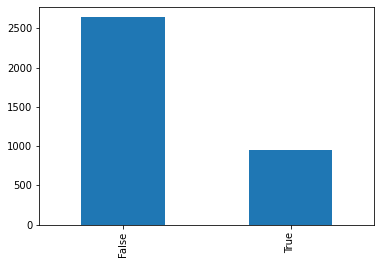

In [4]:
# Смотрим распределение классов
data['Churn'].value_counts().plot(kind='bar')

In [5]:
# Смотрим числовые признаки
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Senior,Tenure,MonthlyCharges
Index,,,
2921,1,71,99.20
2558,0,3,75.15
811,0,19,89.35
2781,0,11,64.05
3292,0,1,20.40


In [6]:
# Выясняем причину, по которой TotalCharges не является числовым признаком
data.TotalCharges.value_counts().head(10)

19.55    6
20.2     6
         6
20.3     4
19.9     4
45.3     4
20.5     4
20.05    4
45.85    3
20.45    3
Name: TotalCharges, dtype: int64

In [7]:
# В признаке TotalCharges заменяем пропуск на 0
data.TotalCharges = data.TotalCharges.replace(' ', 0).astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3591 entries, 0 to 3590
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          3591 non-null   object 
 1   Senior          3591 non-null   int64  
 2   Married         3591 non-null   object 
 3   Dependents      3591 non-null   object 
 4   Tenure          3591 non-null   int64  
 5   Phone           3591 non-null   object 
 6   MultiplePhones  3591 non-null   object 
 7   Internet        3591 non-null   object 
 8   Security        3591 non-null   object 
 9   Backup          3591 non-null   object 
 10  Insurance       3591 non-null   object 
 11  Support         3591 non-null   object 
 12  TV              3591 non-null   object 
 13  Movies          3591 non-null   object 
 14  Contract        3591 non-null   object 
 15  EBilling        3591 non-null   object 
 16  PaymentMethod   3591 non-null   object 
 17  MonthlyCharges  3591 non-null   f

In [8]:
# Проверим значения других числовых признаков (MonthlyCharges и Tenure)
data.MonthlyCharges.value_counts().head(10)

20.05    30
19.55    28
19.85    26
19.70    25
19.95    24
20.25    23
20.00    22
19.90    20
20.35    19
20.50    19
Name: MonthlyCharges, dtype: int64

In [9]:
data.Tenure.value_counts().head(10)

1     317
72    181
2     115
3     113
4      94
71     91
5      77
9      65
7      64
12     64
Name: Tenure, dtype: int64

In [10]:
data["year0"] = data["Tenure"]
data["year1"] = data["Tenure"]
data["year2"] = data["Tenure"]
data["year3"] = data["Tenure"]
data["year4"] = data["Tenure"]
data["year5"] = data["Tenure"]
data["year6"] = data["Tenure"]

data["year0"] [(data['Tenure'] < 12)] = 1
data['year0'] [(data['Tenure'] >= 12)] = 0

data['year1'] [(data['Tenure'] >= 12) & (data['Tenure'] < 24)] = 1
data['year1'] [(data['Tenure'] < 12) | (data['Tenure'] >= 24)] = 0

data['year2'] [(data['Tenure'] >= 24) & (data['Tenure'] < 36)] = 1
data['year2'] [(data['Tenure'] < 24) | (data['Tenure'] >= 36)] = 0

data['year3'] [(data['Tenure'] >= 36) & (data['Tenure'] < 48)] = 1
data['year3'] [(data['Tenure'] < 36) | (data['Tenure'] >= 48)] = 0

data['year4'] [(data['Tenure'] >= 48) & (data['Tenure'] < 60)] = 1
data['year4'] [(data['Tenure'] < 48) | (data['Tenure'] >= 60)] = 0

data['year5'] [(data['Tenure'] >= 60) & (data['Tenure'] < 72)] = 1
data['year5'] [(data['Tenure'] < 60) | (data['Tenure'] >= 72)] = 0

data['year6'] [(data['Tenure'] >= 72) & (data['Tenure'] < 84)] = 1
data['year6'] [(data['Tenure'] < 72) | (data['Tenure'] >= 84)] = 0

data = data.drop('Tenure', 1)
data

,Gender,Senior,Married,Dependents,Phone,MultiplePhones,Internet,Security,Backup,Insurance,...,MonthlyCharges,TotalCharges,Churn,year0,year1,year2,year3,year4,year5,year6
Index,,,,,,,,,,,,,,,,,,,,,
0,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,...,54.20,3623.95,False,0,0,0,0,0,1,0
1,Female,0,No,No,Yes,Yes,DSL,Yes,Yes,No,...,64.40,2088.75,True,0,0,1,0,0,0,0
2,Female,1,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,...,96.60,6827.50,False,0,0,0,0,0,0,1
3,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,...,63.55,4014.20,False,0,0,0,0,0,1,0
4,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,...,95.75,6511.25,False,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,80.20,384.25,False,1,0,0,0,0,0,0
3587,Female,0,Yes,Yes,Yes,No,DSL,Yes,No,Yes,...,77.55,5574.35,False,0,0,0,0,0,1,0
3588,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,...,86.45,5762.95,False,0,0,0,0,0,1,0


In [11]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Senior,MonthlyCharges,TotalCharges,year0,year1,year2,year3,year4,year5,year6
Index,,,,,,,,,,
1140,0,81.30,3541.10,0,0,0,1,0,0,0
2612,0,19.75,145.00,1,0,0,0,0,0,0
3196,0,90.60,6441.85,0,0,0,0,0,0,1
2066,0,19.55,876.15,0,0,0,1,0,0,0
2417,0,54.10,1373.00,0,0,1,0,0,0,0


In [12]:
data = data.replace({'Gender': {'Female': 1, 'Male': 0}, 
                     'Married': {'Yes': 1, 'No': 0}, 
                     'Phone': {'Yes': 1, 'No': 0},
                     'EBilling': {'Yes': 1, 'No': 0},
                     'Dependents': {'Yes': 1, 'No': 0},
                     'MultiplePhones': {'No phone service': 0, 'No': 0, 'Yes': 1},
                     'Security': {'No internet service': 0, 'No': 0, 'Yes': 1},
                     'Backup': {'No internet service': 0, 'No': 0, 'Yes': 1},
                     'Insurance': {'No internet service': 0, 'No': 0, 'Yes': 1},
                     'Support': {'No internet service': 0, 'No': 0, 'Yes': 1},
                     'TV': {'No internet service': 0, 'No': 0, 'Yes': 1},
                     'Movies': {'No internet service': 0, 'No': 0, 'Yes': 1}
                    })

In [13]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Gender,Senior,Married,Dependents,Phone,MultiplePhones,Security,Backup,Insurance,Support,...,EBilling,MonthlyCharges,TotalCharges,year0,year1,year2,year3,year4,year5,year6
Index,,,,,,,,,,,,,,,,,,,,,
733,1,0,1,1,1,0,1,1,0,1,...,1,58.20,3810.8,0,0,0,0,0,1,0
2330,1,0,0,0,1,1,0,0,0,0,...,1,84.60,1115.2,0,1,0,0,0,0,0
1282,1,0,0,0,1,0,0,0,0,0,...,0,20.10,39.8,1,0,0,0,0,0,0
2662,0,1,0,0,1,0,0,0,0,0,...,1,78.50,874.2,1,0,0,0,0,0,0
3336,1,0,1,1,1,1,0,1,0,1,...,1,83.65,5733.4,0,0,0,0,0,1,0


In [14]:
data.nunique()

Gender               2
Senior               2
Married              2
Dependents           2
Phone                2
MultiplePhones       2
Internet             3
Security             2
Backup               2
Insurance            2
Support              2
TV                   2
Movies               2
Contract             3
EBilling             2
PaymentMethod        4
MonthlyCharges    1293
TotalCharges      3425
Churn                2
year0                2
year1                2
year2                2
year3                2
year4                2
year5                2
year6                2
dtype: int64

In [15]:
# Закодируем категориальные данные (one-hot-enconding)
data_dummy = pd.get_dummies(data, columns = {'Internet', 'Contract', 'PaymentMethod'}, drop_first=True)
numeric_data = data_dummy.select_dtypes(include=np.number)
numeric_data.sample(5)

,Gender,Senior,Married,Dependents,Phone,MultiplePhones,Security,Backup,Insurance,Support,...,year4,year5,year6,Internet_Fiber optic,Internet_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Index,,,,,,,,,,,,,,,,,,,,,
1317,0,1,1,0,1,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3521,1,1,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
253,1,0,1,0,1,1,1,1,1,1,...,0,0,1,0,0,0,1,0,1,0
2530,0,0,1,1,1,1,1,0,1,1,...,0,0,0,0,0,1,0,0,0,1
495,0,0,0,0,1,0,1,0,1,1,...,0,0,0,0,0,1,0,0,1,0


In [16]:
# Проведем масштабирование
# Алгоритмы машинного обучения работают лучше, когда входные числовые переменные попадают в аналогичный масштаб
# Масштабируем между 0 и 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d = scaler.fit_transform(data_dummy)

names = list(data_dummy)
scaled_data = pd.DataFrame(d, columns=names)
scaled_data.head()

,Gender,Senior,Married,Dependents,Phone,MultiplePhones,Security,Backup,Insurance,Support,...,year4,year5,year6,Internet_Fiber optic,Internet_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [17]:
# Разобьём данные на тренировочные и тестовые
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data,
                                                    scaled_data.Churn,
                                                    test_size = 0.25,
                                                    random_state = 103) # 102 - 0.492
X_train = X_train.drop('Churn', 1)
X_test = X_test.drop('Churn', 1)

# LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=3, max_iter=7, solver = 'sag', multi_class= 'ovr').fit(X_train, Y_train)
lr_clf_predictions = lr_clf.predict(X_train)

Тренировка
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      1976
         1.0       0.68      0.46      0.55       717

    accuracy                           0.80      2693
   macro avg       0.75      0.69      0.71      2693
weighted avg       0.79      0.80      0.78      2693

0.43948130233021715


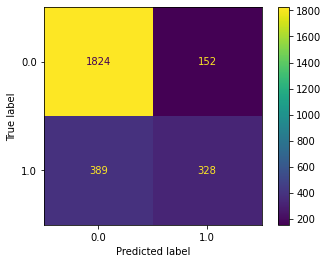

In [19]:
print ("Тренировка")
from sklearn.metrics import classification_report, plot_confusion_matrix, matthews_corrcoef
print (classification_report(Y_train, lr_clf_predictions))
print (matthews_corrcoef(Y_train, lr_clf_predictions))
plot_confusion_matrix(estimator=lr_clf, X= X_train, y_true=Y_train)


In [20]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

lr_params = {'solver': ['sag', 'liblinear', 'lbfgs'],
             'max_iter': [7, 8, 9, 10, 11, 12, 13, 15, 17],
             'multi_class': ['multinomial', 'ovr'],
             'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9]
              }

grid = GridSearchCV(LogisticRegression(),
                    lr_params,
                    refit=True,
                    scoring='f1_macro',
                    n_jobs = -1,
                    cv=StratifiedKFold(n_splits = 5),
                    verbose=2
                   )

grid_best_model = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


In [21]:
grid.best_score_

0.7305546399114896

In [22]:
grid.best_params_

{'max_iter': 7, 'multi_class': 'ovr', 'random_state': 3, 'solver': 'sag'}

Тест
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       663
         1.0       0.69      0.51      0.58       235

    accuracy                           0.81       898
   macro avg       0.76      0.71      0.73       898
weighted avg       0.80      0.81      0.80       898

0.47361032226586686


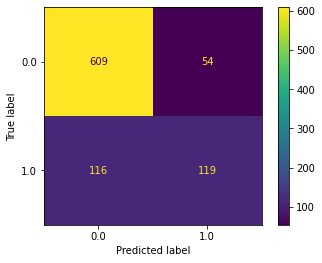

In [23]:
print ("Тест")
print (classification_report(Y_test, lr_clf.predict(X_test)))
plot_confusion_matrix(estimator=lr_clf, X= X_test, y_true=Y_test)
print (matthews_corrcoef(Y_test, lr_clf.predict(X_test)))

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier

rf_params = {'n_estimators': [200, 225, 250, 275, 300],
             'max_depth': [15, 16, 17, 18, 19],
             'criterion': ['entropy', 'gini'],
             'random_state': [1, 2, 3],
             'min_samples_leaf': [5, 6, 7, 8, 9]
              }

grid = GridSearchCV(RandomForestClassifier(),
                    rf_params,
                    refit=True,
                    scoring='f1_macro',
                    n_jobs = -1,
                    cv=StratifiedKFold(n_splits = 5),
                    verbose=2
                   )

grid_best_model = grid.fit(X_train, Y_train)

grid.best_score_

grid.best_params_

## VotingClassifier

In [25]:
clf1 = LogisticRegression(multi_class='multinomial', max_iter = 13, solver= 'sag', random_state=3)
clf2 = RandomForestClassifier(criterion = 'entropy', n_estimators=300, min_samples_leaf=6, max_depth = 16, random_state=3)
clf3 = GaussianNB()

Тренировка
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84      1976
         1.0       0.57      0.76      0.66       717

    accuracy                           0.79      2693
   macro avg       0.74      0.78      0.75      2693
weighted avg       0.81      0.79      0.79      2693

0.5152600962371269


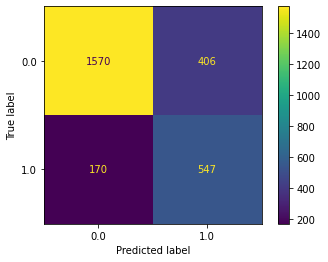

In [26]:
vc = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting= 'soft').fit(X_train, Y_train)
#vc = VotingClassifier(estimators=[('rf', clf2), ('gnb', clf3)], voting= 'soft').fit(X_train, Y_train)
vc_predictions = vc.predict(X_train)
print ("Тренировка")
from sklearn.metrics import classification_report, plot_confusion_matrix, matthews_corrcoef
print (classification_report(Y_train, vc_predictions))
print (matthews_corrcoef(Y_train, vc_predictions))
plot_confusion_matrix(estimator=vc, X= X_train, y_true=Y_train)

Тест
              precision    recall  f1-score   support

         0.0       0.90      0.78      0.84       663
         1.0       0.55      0.76      0.64       235

    accuracy                           0.78       898
   macro avg       0.73      0.77      0.74       898
weighted avg       0.81      0.78      0.78       898

0.493444044950244


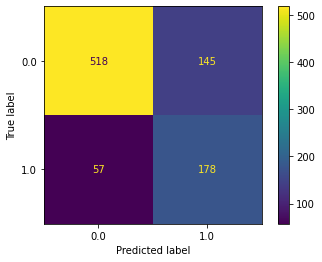

In [27]:
print ("Тест")
print (classification_report(Y_test, vc.predict(X_test)))
plot_confusion_matrix(estimator=vc, X= X_test, y_true=Y_test)
print (matthews_corrcoef(Y_test, vc.predict(X_test)))

## GradientBoosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_params = {'n_estimators': [100],
             'learning_rate': [0.1, 0.4, 0.7, 1],
             'max_depth': [15, 16, 17, 18, 19],
             #'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9],
             'min_samples_leaf': [5, 6, 7, 8, 9]
              }

grid = GridSearchCV(GradientBoostingClassifier(),
                    gbc_params,
                    refit=True,
                    scoring='f1_macro',
                    n_jobs = -1,
                    cv=StratifiedKFold(n_splits = 5),
                    verbose=2
                   )

grid_best_model = grid.fit(X_train, Y_train)

grid.best_score_

grid.best_params_

Тренировка
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92      1976
         1.0       0.85      0.69      0.76       717

    accuracy                           0.89      2693
   macro avg       0.87      0.82      0.84      2693
weighted avg       0.88      0.89      0.88      2693

0.6938298435264589


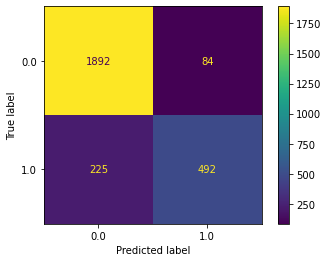

In [29]:
gbc_clf = GradientBoostingClassifier(learning_rate = 0.089, 
                            max_depth = 6, 
                            min_samples_leaf = 10, 
                            n_estimators = 45).fit(X_train, Y_train)
gbc_predictions = gbc_clf.predict(X_train)
print ("Тренировка")
from sklearn.metrics import classification_report, plot_confusion_matrix, matthews_corrcoef
print (classification_report(Y_train, gbc_predictions))
print (matthews_corrcoef(Y_train, gbc_predictions))
plot_confusion_matrix(estimator=gbc_clf, X= X_train, y_true=Y_train)

Тест
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       663
         1.0       0.65      0.54      0.59       235

    accuracy                           0.80       898
   macro avg       0.75      0.72      0.73       898
weighted avg       0.79      0.80      0.80       898

0.4643358364152272


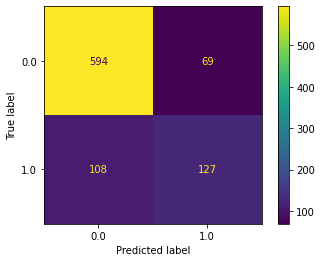

In [30]:
print ("Тест")
print (classification_report(Y_test, gbc_clf.predict(X_test)))
plot_confusion_matrix(estimator=gbc_clf, X= X_test, y_true=Y_test)
print (matthews_corrcoef(Y_test, gbc_clf.predict(X_test)))

## Проверка на тестовых данных

In [31]:
test_df = pd.read_csv('test.csv', index_col=0)
test_df.TotalCharges = test_df.TotalCharges.replace(' ', 0).astype(float)

test_df["year0"] = test_df["Tenure"]
test_df["year1"] = test_df["Tenure"]
test_df["year2"] = test_df["Tenure"]
test_df["year3"] = test_df["Tenure"]
test_df["year4"] = test_df["Tenure"]
test_df["year5"] = test_df["Tenure"]
test_df["year6"] = test_df["Tenure"]

test_df["year0"] [(test_df['Tenure'] < 12)] = 1
test_df['year0'] [(test_df['Tenure'] >= 12)] = 0

test_df['year1'] [(test_df['Tenure'] >= 12) & (test_df['Tenure'] < 24)] = 1
test_df['year1'] [(test_df['Tenure'] < 12) | (test_df['Tenure'] >= 24)] = 0

test_df['year2'] [(test_df['Tenure'] >= 24) & (test_df['Tenure'] < 36)] = 1
test_df['year2'] [(test_df['Tenure'] < 24) | (test_df['Tenure'] >= 36)] = 0

test_df['year3'] [(test_df['Tenure'] >= 36) & (test_df['Tenure'] < 48)] = 1
test_df['year3'] [(test_df['Tenure'] < 36) | (test_df['Tenure'] >= 48)] = 0

test_df['year4'] [(test_df['Tenure'] >= 48) & (test_df['Tenure'] < 60)] = 1
test_df['year4'] [(test_df['Tenure'] < 48) | (test_df['Tenure'] >= 60)] = 0

test_df['year5'] [(test_df['Tenure'] >= 60) & (test_df['Tenure'] < 72)] = 1
test_df['year5'] [(test_df['Tenure'] < 60) | (test_df['Tenure'] >= 72)] = 0

test_df['year6'] [(test_df['Tenure'] >= 72) & (test_df['Tenure'] < 84)] = 1
test_df['year6'] [(test_df['Tenure'] < 72) | (test_df['Tenure'] >= 84)] = 0

test_df = test_df.drop('Tenure', 1)

test_df = test_df.replace({'Gender': {'Female': 1, 'Male': 0}, 
                     'Married': {'Yes': 1, 'No': 0}, 
                     'Phone': {'Yes': 1, 'No': 0},
                     'EBilling': {'Yes': 1, 'No': 0},
                     'Dependents': {'Yes': 1, 'No': 0},
                     'MultiplePhones': {'No phone service': 0, 'No': 0, 'Yes': 1},
                     'Security': {'No internet service': 0, 'No': 0, 'Yes': 1},
                     'Backup': {'No internet service': 0, 'No': 0, 'Yes': 1},
                     'Insurance': {'No internet service': 0, 'No': 0, 'Yes': 1},
                     'Support': {'No internet service': 0, 'No': 0, 'Yes': 1},
                     'TV': {'No internet service': 0, 'No': 0, 'Yes': 1},
                     'Movies': {'No internet service': 0, 'No': 0, 'Yes': 1}
                    })
test_dummy = pd.get_dummies(test_df, columns = {'Internet', 'Contract', 'PaymentMethod'}, drop_first = True)


In [32]:
scaler = MinMaxScaler()
d = scaler.fit_transform(test_dummy)

names = list(test_dummy)
scaled_data = pd.DataFrame(d, columns=names)
scaled_data.head()

,Gender,Senior,Married,Dependents,Phone,MultiplePhones,Security,Backup,Insurance,Support,...,year4,year5,year6,Internet_Fiber optic,Internet_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
# Линейная регрессия
# predictions = lr_clf.predict(scaled_data)

# VotingClassifier
predictions = vc.predict(scaled_data)

In [34]:
predictions

array([0., 1., 0., ..., 1., 1., 0.])

In [35]:
final=pd.DataFrame(predictions, columns=['Churn'])
final['Index'] = final.index
final = final[["Index", "Churn"]]
final = final.replace({'Churn': {0: False, 1: True}})
final

,Index,Churn
0,0,False
1,1,True
2,2,False
3,3,False
4,4,True
...,...,...
2390,2390,False
2391,2391,False
2392,2392,True
2393,2393,True


In [36]:
#final.to_csv('submission.csv', index=False)